# Data Mining Project Team 4

## Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load data set in pandas data frame
df = pd.read_csv('bankruptcy_Train.csv')

In [2]:
# Load data set in pandas data frame
df = pd.read_csv('bankruptcy_train.csv')
# Print first 10 rows to get a feel of the data
print(df.head(10))
dfsample1 = df.copy()

      Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
0 -0.031545 -0.091313 -0.040269 -0.013529  0.007406 -0.016047 -0.000264   
1 -0.231729 -0.049448  0.304381 -0.080975  0.007515 -0.016047 -0.034963   
2 -0.058602  0.065060 -0.488404 -0.189489  0.006572 -0.016047 -0.004954   
3 -0.069376  0.044641 -0.181684 -0.140032  0.007477 -0.010915 -0.005599   
4  0.236424 -0.051912  0.678337 -0.014680  0.007879 -0.016047  0.057418   
5  0.133748 -0.047473  0.262848 -0.090748  0.007288  0.058120  0.038096   
6  0.102177 -0.031209  1.129460  0.002407  0.008103  0.042720  0.031246   
7 -0.198342  0.135906 -0.011195 -0.151052  0.006729 -0.449586 -0.030718   
8 -0.111029  0.152887 -1.540984 -0.280303  0.006049 -0.021231 -0.013745   
9  0.272102  0.000103  0.814117 -0.065289  0.007522 -0.016047  0.052368   

      Attr8     Attr9    Attr10  ...    Attr56    Attr57    Attr58     Attr59  \
0  0.641242 -0.748385  0.126789  ...  0.014367  0.005457 -0.014143  -0.020924   
1  0.074710 

## Data Exploration - Predictor Selection

### Checking for Missing Values

In [3]:
#Checking for any missing values
dfsample1.isnull().sum()

#No missing values identified

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

### Mean Analysis

In [4]:
# Data Exploration - Mean analysis:
# Data Partition into Bankrupt and non-bankrupt Data sets: 
dfsample2 = dfsample1.copy()
dfsample_brupt = dfsample2[dfsample2['class']==1]
#dfsample_brupt
dfsample_notbrupt = dfsample2[dfsample2['class']==0]
#print(dfsample_notbrupt)


#Calculating average for bankrupt data set:

dfsample_brupt_1 = dfsample_brupt.copy()
dfsample_bruptavg =pd.DataFrame(dfsample_brupt_1.mean())
#print(dfsample_bruptavg)

# Calculating average for non bankrupt Data set:
dfsample_notbrupt_1 = dfsample_notbrupt.copy()
dfsample_notbruptavg= pd.DataFrame(dfsample_notbrupt_1.mean())
#print(dfsample_notbruptavg)


# Calculating average for complete Data set:
df_avgmean = pd.DataFrame(dfsample1.mean())
#df_avgmean

#Merging Combined and non bankrupt Data set: 
df_comb = pd.merge(df_avgmean,dfsample_notbruptavg,right_index=True,left_index=True,how='inner')
#print(df_comb)

# Merging bankrupt Data set : 
df_comb1 = pd.merge(df_comb,dfsample_bruptavg,right_index=True,left_index=True,how='inner')
df_comb1.columns = ["comb_means","non_bankrupt","bankrupt"]
#print(df_comb1)

# Calculating Class dispersion between Bankrupt and Non Bankrupt Data set :

df_comb1['Class_disp']=df_comb1['non_bankrupt']-df_comb1['bankrupt']
df_comb2 = df_comb1.copy()
df_comb3 = df_comb2.copy()
df_comb3 = df_comb2.drop(index='class')
#print(df_comb3)


#Calculting Absolute value to sort attributes that make a difference between bankrupt and non bankrupt Data set:
df_comb3['absolute value']= df_comb3['Class_disp'].abs()
df_comb3

# Attributes in Descending order of significant dispersion between Data sets  : 

df_comb4 = df_comb3.copy()
df_comb4 = df_comb3.sort_values(by=['absolute value'],ascending=False)
df_comb4.head(10)

# Calculating correlation between each attribute and printing only the pairs that correlated greater than equal to +0.80:
column_list = dfsample2.columns
for i in range(0,len(column_list)-1):
    for j in range(i+1,len(column_list)):
        col_cor = dfsample2[column_list[i]].corr(dfsample2[column_list[j]])
        if col_cor>=0.8:
            print(column_list[i],column_list[j])

Attr1 Attr6
Attr1 Attr10
Attr1 Attr25
Attr1 Attr38
Attr2 Attr7
Attr2 Attr14
Attr2 Attr18
Attr4 Attr40
Attr4 Attr46
Attr6 Attr10
Attr6 Attr25
Attr6 Attr38
Attr7 Attr11
Attr7 Attr14
Attr7 Attr18
Attr7 Attr22
Attr8 Attr17
Attr10 Attr25
Attr10 Attr38
Attr11 Attr14
Attr11 Attr18
Attr11 Attr22
Attr11 Attr35
Attr11 Attr48
Attr14 Attr18
Attr14 Attr22
Attr16 Attr26
Attr18 Attr22
Attr19 Attr23
Attr19 Attr31
Attr19 Attr39
Attr19 Attr42
Attr19 Attr49
Attr19 Attr56
Attr20 Attr43
Attr22 Attr35
Attr22 Attr48
Attr23 Attr31
Attr23 Attr39
Attr23 Attr42
Attr23 Attr49
Attr23 Attr56
Attr25 Attr38
Attr28 Attr54
Attr30 Attr43
Attr30 Attr44
Attr30 Attr62
Attr31 Attr39
Attr31 Attr42
Attr31 Attr49
Attr31 Attr56
Attr32 Attr47
Attr32 Attr52
Attr33 Attr63
Attr35 Attr48
Attr39 Attr42
Attr39 Attr49
Attr39 Attr56
Attr40 Attr46
Attr42 Attr49
Attr42 Attr56
Attr43 Attr44
Attr47 Attr52
Attr49 Attr56
Attr58 Attr62


In [5]:
# Creating a list of attributes to drop due to high correlation:
#Looking at correlation between each pair of attributes, for the pairs with correlation greater than +0.80, we removed the attribute with lowest importance (importance ranked based on above analysis of means) 
attri_todrop =['Attr1','Attr7','Attr14','Attr18','Attr4','Attr7','Attr8','Attr10','Attr14','Attr18','Attr22','Attr35','Attr48','Attr26','Attr19','Attr43','Attr22','Attr23','Attr28','Attr43','Attr44','Attr62','Attr31','Attr32','Attr33','Attr48','Attr42','Attr49','Attr56','Attr40','Attr52','Attr58']
dfsample2 = df.drop(columns=attri_todrop)

# Separate the variables into numerical and categorical

cat_var = ['class']
num_var = list(dfsample2.columns.values[:-1])

# Standardization of the numerical variables is not necessary since the values are already standardized

# Set the correct data types
dfsample3 = dfsample2.copy()
dfsample3[cat_var] = dfsample2[cat_var].astype('category')
dfsample3[num_var] = dfsample2[num_var].astype('float64')

# Convert the categorical dummies
dfsample4 = dfsample3.copy()
dfsample4 = pd.get_dummies(dfsample3, prefix_sep='_')

# Remove the redundant dummies
# Placeholder variable: rdummies
rdummies = ['class_0']
dfsample5 = dfsample4.copy()
dfsample5 = dfsample4.drop(columns=rdummies)

#Printing the final result
print(dfsample5)
print(dfsample5.columns.values)

         Attr2     Attr3     Attr5     Attr6     Attr9    Attr11    Attr12  \
0    -0.091313 -0.040269  0.007406 -0.016047 -0.748385 -0.214423 -0.036576   
1    -0.049448  0.304381  0.007515 -0.016047  0.469815 -0.835505 -0.299606   
2     0.065060 -0.488404  0.006572 -0.016047  0.270351  0.156944 -0.151208   
3     0.044641 -0.181684  0.007477 -0.010915 -0.286746 -0.314756 -0.145529   
4    -0.051912  0.678337  0.007879 -0.016047  0.423405  0.918860  0.208686   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.034814 -0.492082  0.006687 -0.006462 -0.372026 -0.370083 -0.165392   
9996 -0.095260  0.184167  0.007497 -0.034968 -0.393121 -0.390615 -0.169328   
9997  0.061341 -0.830634  0.006716 -0.013742 -0.351828 -0.993696 -0.287411   
9998  0.029524  0.102420  0.008123 -0.018374 -0.480887 -0.242626 -0.204565   
9999 -0.081793  0.734155  0.007850  0.001952 -0.398417 -0.318317 -0.142172   

        Attr13    Attr15    Attr16  ...    Attr53    Attr54    

### Principal Component Analysis

             0         1         2         3         4         5         6  \
0     0.000898  0.032403 -0.074541  0.040293 -1.185623  0.822294 -0.105070   
1     0.884314  0.287615 -0.104649 -0.018762  0.714179  0.696746 -0.094828   
2    -0.205519  0.564413 -0.845476 -0.059369  0.527696 -0.529229  0.017766   
3    -0.160834  0.860640 -1.243781 -0.053327 -0.706486  0.439568 -0.045030   
4    -0.774996 -1.074131  0.877775 -0.042244  0.277252 -1.504013  0.049044   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.120888  1.067721 -1.317648 -0.058524 -0.551817  0.464756 -0.061083   
9996  0.326805 -0.349177  0.485006 -0.022936 -1.288179  0.771504 -0.067420   
9997  0.219769  1.357495 -1.554482 -0.054473 -0.450568  0.675183 -0.035160   
9998 -0.125023  0.574170 -0.702234 -0.017891 -0.151939  0.712574 -0.067458   
9999  0.316459 -0.449319  0.553262 -0.009874 -0.482862  0.841106 -0.068479   

             7         8         9        10        11        1

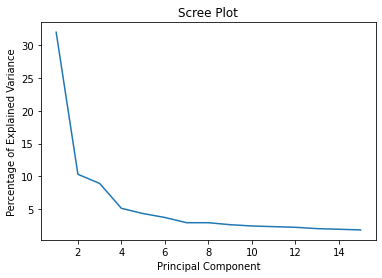

       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  class
0  0.000898  0.032403 -0.074541  0.040293 -1.185623  0.822294 -0.105070      0
1  0.884314  0.287615 -0.104649 -0.018762  0.714179  0.696746 -0.094828      0
2 -0.205519  0.564413 -0.845476 -0.059369  0.527696 -0.529229  0.017766      0
3 -0.160834  0.860640 -1.243781 -0.053327 -0.706486  0.439568 -0.045030      0
4 -0.774996 -1.074131  0.877775 -0.042244  0.277252 -1.504013  0.049044      0
5 -0.393465 -0.351468  0.076010 -0.058338 -0.683024 -0.753907  0.011637      0
6 -0.323419 -0.416043  0.169594 -0.054136 -1.148243 -0.121879 -0.033088      0
7  0.057199  1.459914 -1.382615 -0.033588  0.665309  0.963395 -0.112822      0
8 -0.037179  1.299978 -1.559491  1.073029  0.734966 -0.075457 -0.039781      0
9 -0.679369 -0.483721  0.163092 -0.062366  0.792733 -1.480457  0.021507      0
PCA1     0
PCA2     0
PCA3     0
PCA4     0
PCA5     0
PCA6     0
PCA7     0
class    0
dtype: int64
[0 1]
          PCA1      PCA2

In [6]:
# Data Exploration with Principal Component Analysis:
dfpca1 = df.copy()

from sklearn.decomposition import PCA
pca=PCA(n_components=15)

# Dropping 'class' column
dfpca2 = dfpca1.copy()
dfpca2 = dfpca1.drop(columns='class')
dfpca2

pca.fit(dfpca2)
x_pca=pca.transform(dfpca2)
x_pca.shape

dfpca3 = pd.DataFrame(x_pca)
print(dfpca3)

# Plotting PCA line graph:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.plot(range(1,len(per_var)+1), per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# According to line graph 1 to 7 represents complete dataset

dfpca4 = dfpca3.copy()
dfpca4.columns =["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15"]
dfpca4

#Dropping PCA8 to PCA15
#Here we are using 9 attributes

dfpca5 = dfpca4.copy()
todrop_pca =["PCA8","PCA9","PCA10","PCA11","PCA12","PCA13","PCA14","PCA15"]
dfpca5 = dfpca4.drop(columns=todrop_pca)
dfpca5

# ADDING 'CLASS' column to the final data after PCA
# dfsample5 is Final DataFrame After PCA

dfpca6= dfpca5.copy()
dfpca6['class'] = dfpca1['class']
print(dfpca6.head(10))

print(dfpca6.isnull().sum())

cat_var = ['class']
num_var = list(dfpca6.columns.values[:-1])

print(dfpca6['class'].unique())

# Standardization 
# Set the correct data types
dfpca7 = dfpca6.copy()
dfpca7[cat_var] = dfpca6[cat_var].astype('category')
dfpca7[num_var] = dfpca6[num_var].astype('float64')

# Convert the categorical dummies
dfpca8 = dfpca7.copy()
dfpca8 = pd.get_dummies(dfpca7, prefix_sep='_')

# Remove the redundant dummies
# Placeholder variable: rdummies
rdummies = ['class_0']
dfpca9 = dfpca8.copy()
dfpca9 = dfpca8.drop(columns=rdummies)

#Printing the final result
print(dfpca9)
print(dfpca9.columns.values)

## Data Pre-Processing
The data set was completely made up of numerical independent variables that were standardized prioer to acquisition. The dependent variable is categorical and has been turned into dummies in the previous steps when creating the two data sets (1. Predictors selected using Mean Analysis, 2. Predictors selected using Principal Component Analysis).

In [7]:
#Naming the data sets
Mean_analysis = dfsample5.copy()
Mean_analysis.name = 'Mean'
P_C_A = dfpca9.copy()
P_C_A.name ='PCA'

## Model Selection and Training

In this section of the code, the two data frames created above will be run on a wide variety of models either being over-sampled or left as original. 

In [8]:
#import all necessary libraries and functions for the iterative process of model evaluation

#Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#Scoring 
from sklearn.metrics import roc_auc_score

#Utility
import numpy as np
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image
import time
from sklearn.model_selection import train_test_split

### ADABoost Decision Tree Classifier

In [9]:
def adaboost(train_set, test_set, treat):
    #Start the clock of runtime
    start_time = time.time()

    #Set dependent variable placeholder
    DV = 'class_1'
    y = train_set[DV]
    X = train_set.drop(columns=[DV])
    
    #Set placeholder variable for number of folds
    kfolds = 5
    
    #Set a parameter grid for the GridSearchCV
    param_grid = {
                    "base_estimator__criterion" : ["gini", "entropy"],
                    "base_estimator__splitter" :   ["best", "random"],
                    "n_estimators": [10, 50, 100, 500]
             }
    
    #If statement to check whether train set needs to be oversampled
    if treat == "Oversample":
        
        #Create a parameter grid specifically for the oversampling method.
        param_grid = {
                "class__base_estimator__criterion" : ["gini", "entropy"],
                "class__base_estimator__splitter" :   ["best", "random"],
                "class__n_estimators": [10, 50, 100, 500]
         }
        
        #Assigning models and functions
        DTC = DecisionTreeClassifier(random_state = 1, max_features = "auto", max_depth = 10)
        ABC = AdaBoostClassifier(base_estimator = DTC, random_state=1)
        smote_f = SMOTE(random_state=1)
        
        #Load the pipeline with the models and oversampling method
        pipeline = Pipeline([('sampling', smote_f), ('class', ABC)])
        
        #Use a GridSearchCV to find the optimal model candidate
        grid_cv = GridSearchCV(pipeline, param_grid, scoring = 'roc_auc', cv = kfolds, n_jobs=-1)
        grid_cv.fit(X, y)
        ABC_clf_optimal = grid_cv.best_estimator_
    
    if treat == "Untreated":
        #Assigning models and functions
        DTC = DecisionTreeClassifier(random_state = 1, max_features = "auto", max_depth = 10)
        ABC = AdaBoostClassifier(base_estimator = DTC, random_state=1)
        
        #Use a GridSearchCV to find the optimal model candidate
        grid_cv = GridSearchCV(ABC, param_grid, scoring = 'roc_auc', cv = kfolds, n_jobs=-1)
        grid_cv.fit(X, y)
        ABC_clf_optimal = grid_cv.best_estimator_
        

    # y_test_actual is the actual values of the DV in the test partition
    y_test_actual = test_set[DV]

    # X_test is the predictor values in the test partition
    X_test = test_set.drop(columns=[DV])

    # Get the AUC of the best LogisticRegression Classifier
    roc_auc = roc_auc_score(y_test_actual, ABC_clf_optimal.predict_proba(X_test)[:,1])

    #getting the accuracy of the best LogisticRegression Classifier
    Accuracy_score = ABC_clf_optimal.score(X_test, y_test_actual)

    #Calculating run time of program
    Runtime = time.time() - start_time

    #Setting the model name for data frame
    model_name = 'Adaboost - Default Decision Tree'
    
    #imputing a confusion matrix for false positives/negatives
    DV = 'class_1'

    y_test_prediction = ABC_clf_optimal.predict(X_test)

    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_test_actual, y_test_prediction)
    
    false_positives = confusion_matrix[0][1]
    
    false_negatives = confusion_matrix[1][0]
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Data Set': data_set.name,
        'Treatment': treat,
        'Model': model_name,
        'Accuracy': Accuracy_score,
        'AUC_ROC Score': roc_auc,
        'Runtime Program (min)': Runtime/60,
        'False Positive Predictions': false_positives,
        'False Negative Predictions': false_negatives
    }

### Random Forest Classifier

In [10]:
def random_forest(train_set, test_set, treat):
    
    #Set placeholder variable for number of folds
    kfolds = 5
    
    #Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]

    #Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    #Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
    max_depth.append(None)

    #Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    #Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    #Create the random grid
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    
    #Start the clock of runtime
    start_time = time.time()

    #Set dependent variable placeholder
    DV = 'class_1'
    y = train_set[DV]
    X = train_set.drop(columns=[DV])
    
    #if statement to determine whether the train set needs oversampling or not
    if treat == "Oversample":
        
        #Create a parameter grid specifically for the oversampling method.
        param_grid = {'class__n_estimators': n_estimators,
               'class__max_features': max_features,
               'class__max_depth': max_depth,
               'class__min_samples_split': min_samples_split,
               'class__min_samples_leaf': min_samples_leaf}
        
        #Assigning models and functions
        RFC = RandomForestClassifier(random_state=1)
        smote_f = SMOTE(random_state=1)
        
        #Load the pipeline with the models and oversampling method
        pipeline = Pipeline([('sampling', smote_f), ('class', RFC)])
        
        #Use a GridSearchCV to find the optimal model candidate
        grid_cv = GridSearchCV(pipeline, param_grid, scoring = 'roc_auc', cv = kfolds, n_jobs=-1)
        grid_cv.fit(X, y)
        RFC_clf_optimal = grid_cv.best_estimator_
        
    elif treat == "Untreated":
        
        #Use a GridSearchCV to find the optimal model candidate
        gridsearch = GridSearchCV(estimator = RandomForestClassifier(random_state=1), param_grid = param_grid, cv = kfolds, n_jobs = -1)
        gridsearch.fit(X,y)
        RFC_clf_optimal = gridsearch.best_estimator_

    
    # y_test_actual is the actual values of the DV in the test partition
    y_test_actual = test_set[DV]

    # X_test is the predictor values in the test partition
    X_test = test_set.drop(columns=[DV])

    # Get the AUC of the best LogisticRegression Classifier
    from sklearn.metrics import roc_auc_score
    roc_auc = roc_auc_score(y_test_actual, RFC_clf_optimal.predict_proba(X_test)[:,1])

    #getting the accuracy of the best LogisticRegression Classifier
    Accuracy_score = RFC_clf_optimal.score(X_test, y_test_actual)

    #Calculating run time of program
    Runtime = time.time() - start_time

    #Setting the model name for data frame
    model_name = 'Random Forest'

    #imputing a confusion matrix for false positives/negatives
    DV = 'class_1'

    y_test_prediction = RFC_clf_optimal.predict(X_test)

    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_test_actual, y_test_prediction)
    
    false_positives = confusion_matrix[0][1]
    
    false_negatives = confusion_matrix[1][0]
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Data Set': data_set.name,
        'Treatment': treat,
        'Model': model_name,
        'Accuracy': Accuracy_score,
        'AUC_ROC Score': roc_auc,
        'Runtime Program (min)': Runtime/60,
        'False Positive Predictions': false_positives,
        'False Negative Predictions': false_negatives
    }

### K-Nearest Neighbor

In [11]:
def KNN(train_set, test_set, treat):
    
    #Start the clock of runtime
    start_time = time.time()

    #Set dependent variable placeholder
    DV = 'class_1'
    y = train_set[DV]
    X = train_set.drop(columns=[DV])
    
    #Set placeholder variable for number of folds
    kfolds = 5
    
    #Create a parameter grid for number of neighbors
    max_k = 200
    
    #Set a parameter grid for the GridSearchCV
    param_grid = {'n_neighbors': list(range(1, max_k+1))}
    
    #if statement to determine whether the train set needs oversampling or not
    if treat == "Oversample":
        
        #Create a parameter grid specifically for the oversampling method.
        param_grid = {'class__n_neighbors': list(range(1, max_k+1))}

        #Assigning models and functions
        KNN = KNeighborsClassifier(metric='euclidean')
        smote_f = SMOTE(random_state=1)
    
        #Load the pipeline with the models and oversampling method
        pipeline = Pipeline([('sampling', smote_f), ('class', KNN)])

        #Use a GridSearchCV to find the optimal model candidate
        grid_cv = GridSearchCV(pipeline, param_grid, scoring = 'roc_auc', cv = kfolds, n_jobs=-1)
        grid_cv.fit(X, y)
        clf_bestKNN = grid_cv.best_estimator_
    
    if treat == "Untreated":
        
        #Use a GridSearchCV to find the optimal model candidate
        gridsearch = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
        gridsearch.fit(X,y)
        clf_bestKNN = gridsearch.best_estimator_

    # y_test_actual is the actual values of the DV in the test partition
    y_test_actual = test_set[DV]

    # X_test is the predictor values in the test partition
    X_test = test_set.drop(columns=[DV])

    # Get the AUC of the best LogisticRegression Classifier
    roc_auc = roc_auc_score(y_test_actual, clf_bestKNN.predict_proba(X_test)[:,1])

    #getting the accuracy of the best LogisticRegression Classifier
    Accuracy_score = clf_bestKNN.score(X_test, y_test_actual)

    #Calculating run time of program
    Runtime = time.time() - start_time

    #Setting the model name for data frame
    model_name = 'K-NN'

    #imputing a confusion matrix for false positives/negatives
    DV = 'class_1'

    y_test_prediction = clf_bestKNN.predict(X_test)

    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_test_actual, y_test_prediction)
    
    false_positives = confusion_matrix[0][1]
    
    false_negatives = confusion_matrix[1][0]
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Data Set': data_set.name,
        'Treatment': treat,
        'Model': model_name,
        'Accuracy': Accuracy_score,
        'AUC_ROC Score': roc_auc,
        'Runtime Program (min)': Runtime/60,
        'False Positive Predictions': false_positives,
        'False Negative Predictions': false_negatives
    }

### Neural Network

In [12]:
#Train a neural network with Cross-Validation

#Run the neural networking using cross-validation and the hyperparameter grid
def Neural_Network(df_nontest, df_test, treat):
        
    #Start the clock of runtime
    start_time = time.time()

    #Set dependent variable placeholder
    DV = 'class_1'
    y = df_nontest[DV]
    X = df_nontest.drop(columns=[DV])
    
    #Placeholder kfolds
    kfolds = 5

    #The range of nodes
    min_hls = 1
    max_hls = 10

    #Range of alpha
    min_alpha = 0.0001
    max_alpha = 10
    n_alpha = 10
    
    #Set a parameter grid for the GridSearchCV
    param_grid = {'hidden_layer_sizes':np.arange(min_hls, max_hls), 'alpha': list(np.linspace(min_alpha, max_alpha, num=n_alpha))}
    
    #if statement to determine whether the train set needs oversampling or not
    if treat == "Oversample": 
        
        #Create a parameter grid specifically for the oversampling method.
        param_grid = {'class__hidden_layer_sizes':np.arange(min_hls, max_hls), 'class__alpha': list(np.linspace(min_alpha, max_alpha, num=n_alpha))}

        #Assigning models and functions
        NN = MLPClassifier(solver='lbfgs', max_iter=2000, random_state=1)
        smote_f = SMOTE(random_state=1)

        #Load the pipeline with the models and oversampling method
        pipeline = Pipeline([('sampling', smote_f), ('class', NN)])

        #Use a GridSearchCV to find the optimal model candidate
        grid_cv = GridSearchCV(pipeline, param_grid, scoring = 'roc_auc', cv = kfolds, n_jobs=-1)
        grid_cv.fit(X, y)
        NN_clf_optimal = grid_cv.best_estimator_
    
    elif treat == "Untreated":
        
        #Use a GridSearchCV to find the optimal model candidate
        gridsearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=2000, random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
        gridsearch.fit(X,y)
        NN_clf_optimal = gridsearch.best_estimator_

    
    # y_test_actual is the actual values of the DV in the test partition
    y_test_actual = df_test[DV]

    # X_test is the predictor values in the test partition
    X_test = df_test.drop(columns=[DV])

    # Get the AUC of the best LogisticRegression Classifier
    roc_auc = roc_auc_score(y_test_actual, NN_clf_optimal.predict_proba(X_test)[:,1])

    #getting the accuracy of the best LogisticRegression Classifier
    Accuracy_score = NN_clf_optimal.score(X_test, y_test_actual)

    #Calculating run time of program
    Runtime = time.time() - start_time

    #Setting the model name for data frame
    model_name = 'Neural Network'

    #imputing a confusion matrix for false positives/negatives
    DV = 'class_1'

    y_test_prediction = NN_clf_optimal.predict(X_test)

    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_test_actual, y_test_prediction)
    
    false_positives = confusion_matrix[0][1]
    
    false_negatives = confusion_matrix[1][0]
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Data Set': data_set.name,
        'Treatment': treat,
        'Model': model_name,
        'Accuracy': Accuracy_score,
        'AUC_ROC Score': roc_auc,
        'Runtime Program (min)': Runtime/60,
        'False Positive Predictions': false_positives,
        'False Negative Predictions': false_negatives
    }

### Logistic Regression Classifier

In [13]:
#Set a function for log regression
def log_regression(train_set, test_set, treat):
    
    #Set placeholder variable for number of folds
    kfolds = 5

    #Set the min and max alpha for the cross-validation to find it's optimal level between
    min_alpha = 0.01
    max_alpha = 100

    #Generate the inverse of the min and max alpha since this is a requirement for LogisticRegressionCV
    max_C = 1/min_alpha
    min_C = 1/max_alpha

    #Set the number of candidates
    n_candidates = 50

    #Create list to store C points in
    C_list = list(np.linspace(min_C, max_C, num=n_candidates))
    
    #Start the clock of runtime
    start_time = time.time()

    #Set dependent variable placeholder
    DV = 'class_1'
    y = train_set[DV]
    X = train_set.drop(columns=[DV])
    
    #if statement to determine whether the train set needs oversampling or not
    if treat == "Oversample":
        
        #Load the pipeline with the models and oversampling method
        imba_pipeline = make_pipeline(SMOTE(random_state=1), 
                                  LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=1))
        
        #Set a parameter grid for the GridSearchCV
        param_grid = {'C': C_list}
        #Create a parameter grid specifically for the oversampling method.
        new_params = {'logisticregression__' + key: param_grid[key] for key in param_grid}
        
        #Use a GridSearchCV to find the optimal model candidate
        grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kfolds, n_jobs=-1)
        grid_imba.fit(X,y)
        LOG_clf_optimal = grid_imba.best_estimator_.named_steps['logisticregression']

    elif treat == "Untreated":
        #Use Cross-Validation to find the optimal model candidate
        LOG_clf_optimal = LogisticRegressionCV(Cs=C_list, cv=kfolds, scoring='roc_auc', penalty='l1', solver='saga', max_iter=1000, random_state=1, n_jobs=-1).fit(X,y)

    # y_test_actual is the actual values of the DV in the test partition
    y_test_actual = test_set[DV]

    # X_test is the predictor values in the test partition
    X_test = test_set.drop(columns=[DV])

    # Get the AUC of the best LogisticRegression Classifier
    roc_auc = roc_auc_score(y_test_actual, LOG_clf_optimal.predict_proba(X_test)[:,1])

    #getting the accuracy of the best LogisticRegression Classifier
    Accuracy_score = LOG_clf_optimal.score(X_test, y_test_actual)

    #Calculating run time of program
    Runtime = time.time() - start_time

    #Setting the model name for data frame
    model_name = 'Logistic Regression'
    
    #
    def summary_coef(model):
        n_predictors = X_test.shape[1]
        coef = pd.DataFrame(model.coef_.reshape(1, n_predictors),columns=X_test.columns.values)
        coef['Intercept'] = model.intercept_
        return coef.transpose()
    
    print(summary_coef(LOG_clf_optimal))

    #imputing a confusion matrix for false positives/negatives
    DV = 'class_1'

    y_test_prediction = LOG_clf_optimal.predict(X_test)

    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_test_actual, y_test_prediction)
    
    false_positives = confusion_matrix[0][1]
    
    false_negatives = confusion_matrix[1][0]
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Data Set': data_set.name,
        'Treatment': treat,
        'Model': model_name,
        'Accuracy': Accuracy_score,
        'AUC_ROC Score': roc_auc,
        'Runtime Program (min)': Runtime/60,
        'False Positive Predictions': false_positives,
        'False Negative Predictions': false_negatives
    }

### Decision Tree Classifier

In [14]:
# Defining DecisionTree model: 

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile

#Set Function for DecisionTree
def decision_tree(train_set, test_set, treat):
    #Start the clock of runtime
    start_time = time.time()
    
    #Set placeholder variable for number of folds
    kfolds = 5

    # range of depths we will search for the best pruned tree
    maximum_depth = 100
    minimum_depth = 1
    
    #Set a parameter grid for the GridSearchCV
    param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

    #Set dependent variable placeholder
    DV = 'class_1'
    y = train_set[DV]
    X = train_set.drop(columns=[DV])
    
    #if statement to determine whether the train set needs oversampling or not
    if treat == "Oversample":
        
        #Load the pipeline with the models and oversampling method
        imba_pipeline = make_pipeline(SMOTE(random_state=1), 
                              DecisionTreeClassifier(criterion='entropy', random_state=1))
        
        #Create a parameter grid specifically for the oversampling method.
        new_params = {'decisiontreeclassifier__' + key: param_grid[key] for key in param_grid}
        
        #Use a GridSearchCV to find the optimal model candidate
        grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kfolds, scoring='roc_auc', n_jobs=-1)
        grid_imba.fit(X,y)
        clf_BPT = grid_imba.best_estimator_.named_steps['decisiontreeclassifier']
        
    
    elif treat == "Untreated":
        
        #Use a GridSearchCV to find the optimal model candidate
        gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
        gridsearch.fit(X,y)
        clf_BPT = gridsearch.best_estimator_
        
    # y_test_actual is the actual values of the DV in the test partition
    y_test_actual = test_set[DV]

    # X_test is the predictor values in the test partition
    X_test = test_set.drop(columns=[DV])

    # Get the AUC of the best DecisionTree 
    roc_auc = roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1])
    

    #getting the accuracy of the best LogisticRegression Classifier
    Accuracy_score = clf_BPT.score(X_test, y_test_actual)

    #Calculating run time of program
    Runtime = time.time() - start_time

    #Setting the model name for data frame
    model_name = 'Decision Tree'

    #imputing a confusion matrix for false positives/negatives
    DV = 'class_1'

    y_test_prediction = clf_BPT.predict(X_test)

    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_test_actual, y_test_prediction)
    
    false_positives = confusion_matrix[0][1]
    
    false_negatives = confusion_matrix[1][0]
    
    #return a dictionary to report the performance in a dataframe
    return {
        'Data Set': data_set.name,
        'Treatment': treat,
        'Model': model_name,
        'Accuracy': Accuracy_score,
        'AUC_ROC Score': roc_auc,
        'Runtime Program (min)': Runtime/60,
        'False Positive Predictions': false_positives,
        'False Negative Predictions': false_negatives
    }

### Looping through all combinations
Below is a triple nested for loop. The first loop runs over the data sets chosen by the different methods of predictor selection (Mean Analysis and PCA). The second loop runs over several different models. The third loop runs over two different options: not treating the data set for its imbalanced class or treatment with over-sampling. The results of all these loops and captured in a dataframe.

In [15]:
#Defining lists for the nested for loops
data_set_list = [Mean_analysis,P_C_A]
#model_list = ['Neural Network', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'K-NN', 'ADABoost']

#Create a new list to leave out Random Forest Classification since this took several hours to run and is therefore not worth it.
model_list = ['Neural Network', 'Logistic Regression', 'Decision Tree', 'K-NN', 'ADABoost']
treatment = ['Untreated', 'Oversample']

#Creating the data frame to store the results of each data set, oversampling technique and model performance
model_performance_df = pd.DataFrame()

for data_set in data_set_list:
    #Set variables for the data partitioning
    df4partition = data_set
    testpart_size = 0.2
    
    #Split data set in train and test
    df_nontest, df_test = train_test_split(df4partition, test_size=testpart_size, random_state=1)

    #Loop through the different models and report the corresponding results
    print("starting with dataset")
    for model in model_list:
        print(model)
        for treat in treatment:
            print(treat)
            if model == 'Neural Network':
                model_information = Neural_Network(df_nontest, df_test, treat)
                model_information_df = pd.DataFrame.from_dict([model_information])
                model_performance_df = model_performance_df.append(model_information_df)
            elif model == 'Logistic Regression':
                model_information = log_regression(df_nontest, df_test, treat)
                model_information_df = pd.DataFrame.from_dict([model_information])
                model_performance_df = model_performance_df.append(model_information_df)
            elif model == 'Random Forest':
                model_information = random_forest(df_nontest, df_test, treat)
                model_information_df = pd.DataFrame.from_dict([model_information])
                model_performance_df = model_performance_df.append(model_information_df)
            elif model == 'Decision Tree':
                model_information = decision_tree(df_nontest, df_test, treat)
                model_information_df = pd.DataFrame.from_dict([model_information])
                model_performance_df = model_performance_df.append(model_information_df)
            elif model == 'K-NN':
                model_information = KNN(df_nontest, df_test, treat)
                model_information_df = pd.DataFrame.from_dict([model_information])
                model_performance_df = model_performance_df.append(model_information_df)
            elif model == 'ADABoost':
                model_information = adaboost(df_nontest, df_test, treat)
                model_information_df = pd.DataFrame.from_dict([model_information])
                model_performance_df = model_performance_df.append(model_information_df)
                

model_performance_df

starting with dataset
Neural Network
Untreated
Oversample
Logistic Regression
Untreated


C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:

                  0
Attr2      0.078232
Attr3      0.127305
Attr5      0.016333
Attr6      0.037465
Attr9      0.003851
Attr11     0.135826
Attr12     0.030530
Attr13    -0.059674
Attr15     0.000484
Attr16    -1.207312
Attr17    -0.233174
Attr20     0.046586
Attr21    -0.054544
Attr24     0.574866
Attr25    -0.376741
Attr27    -0.001752
Attr29    -0.009767
Attr30    -0.132256
Attr34     1.300772
Attr36    -0.389399
Attr37     0.022668
Attr38    -0.085667
Attr39     0.012383
Attr41     0.000000
Attr45    -0.047283
Attr46    -0.715036
Attr47    -0.005665
Attr50    -0.855918
Attr51     0.170191
Attr53     0.117150
Attr54    -0.015067
Attr55     0.049542
Attr57    -0.054583
Attr59    -0.023872
Attr60    -0.137669
Attr61    -0.040987
Attr63    -1.550989
Attr64    -0.020780
Intercept -4.949517
Oversample


C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


                  0
Attr2      0.360207
Attr3      0.475015
Attr5      0.040150
Attr6      0.086131
Attr9     -0.057746
Attr11     0.345061
Attr12     0.415574
Attr13    -0.119496
Attr15    -0.001019
Attr16    -1.678053
Attr17     0.532015
Attr20     0.031868
Attr21    -0.102288
Attr24     1.068444
Attr25    -1.370485
Attr27    -0.020954
Attr29     0.019955
Attr30    -0.287109
Attr34     2.468646
Attr36    -0.588845
Attr37     0.013898
Attr38    -0.360357
Attr39     0.028404
Attr41     0.002831
Attr45    -0.104679
Attr46    -1.534507
Attr47    -0.024556
Attr50    -1.947145
Attr51     0.187568
Attr53     0.249701
Attr54    -0.037721
Attr55     0.243165
Attr57    -0.073319
Attr59    -0.073634
Attr60    -0.528292
Attr61    -0.188897
Attr63    -3.135948
Attr64    -0.083015
Intercept -2.207045
Decision Tree
Untreated
Oversample
K-NN
Untreated
Oversample
ADABoost
Untreated
Oversample
starting with dataset
Neural Network
Untreated
Oversample
Logistic Regression
Untreated


C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:

                  0
PCA1       0.014372
PCA2       0.220928
PCA3      -0.288387
PCA4      -0.015511
PCA5       0.219626
PCA6       0.036974
PCA7      -0.015502
Intercept -4.053633
Oversample


C:\Users\Leonardo Luchetti\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


                  0
PCA1      -0.112782
PCA2       0.355813
PCA3      -0.454953
PCA4      -0.186649
PCA5       0.437937
PCA6       0.172406
PCA7      -0.050603
Intercept -0.606606
Decision Tree
Untreated
Oversample
K-NN
Untreated
Oversample
ADABoost
Untreated
Oversample


,Data Set,Treatment,Model,Accuracy,AUC_ROC Score,Runtime Program (min),False Positive Predictions,False Negative Predictions
0,Mean,Untreated,Neural Network,0.987500,0.920749,3.205485,14,11
0,Mean,Oversample,Neural Network,0.953500,0.916728,13.729502,81,12
0,Mean,Untreated,Logistic Regression,0.836031,0.836031,0.974744,1,35
0,Mean,Oversample,Logistic Regression,0.699500,0.839113,14.142247,596,5
0,Mean,Untreated,Decision Tree,0.981000,0.802712,0.574411,5,33
0,Mean,Oversample,Decision Tree,0.840000,0.881316,2.257331,312,8
0,Mean,Untreated,K-NN,0.982500,0.812883,5.256762,0,35
0,Mean,Oversample,K-NN,0.666000,0.795500,9.943975,660,8
0,Mean,Untreated,Adaboost - Default Decision Tree,0.980500,0.881170,2.196095,4,35
0,Mean,Oversample,Adaboost - Default Decision Tree,0.975500,0.888819,4.458411,19,30


In [42]:
#adding a new column to the dataframe, measuring the overall quality of the model
#ranking algorithm = (AUC Score - (Runtime/200))
model_performance_df['Ranking Algorithm'] = model_performance_df['AUC_ROC Score']-(model_performance_df['Runtime Program (min)']/200)

model_performance_df = model_performance_df.sort_values(by='Ranking Algorithm', ascending=False)

model_performance_df.head(5)

,Data Set,Treatment,Model,Accuracy,AUC_ROC Score,Runtime Program (min),False Positive Predictions,False Negative Predictions,Ranking Algorithm
0,Mean,Untreated,Neural Network,0.9875,0.920749,3.205485,14,11,0.904721
0,Mean,Untreated,Adaboost - Default Decision Tree,0.9805,0.881170,2.196095,4,35,0.870190
0,Mean,Oversample,Decision Tree,0.8400,0.881316,2.257331,312,8,0.870029
0,Mean,Oversample,Adaboost - Default Decision Tree,0.9755,0.888819,4.458411,19,30,0.866527
0,Mean,Oversample,Neural Network,0.9535,0.916728,13.729502,81,12,0.848081
